# Machine Learning with KNN 

In this project, we will work with the Car Evaluation data set, indicating in which category the car belongs.
We'll use a K-Nearest Neighbors model that will predict the category of a car, based on his/her features.

In [121]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## Data

In [70]:
data = pd.read_csv("../Data/car.data")

In [71]:
data.head()

,buying,maint,door,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
door        1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [73]:
data.describe()

,buying,maint,door,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,5,3,3,3,4
top,vhigh,vhigh,2,more,big,low,unacc
freq,432,432,432,576,576,576,1210


All the unique values in each columns.

In [74]:
for col in data.columns:
    print(col+":", list(pd.unique(data[col])))

buying: ['vhigh', 'high', 'med', 'low']
maint: ['vhigh', 'high', 'med', 'low']
door: ['2', '3', '4', '5more', 'more']
persons: ['2', '4', 'more']
lug_boot: ['small', 'med', 'big']
safety: ['low', 'med', 'high']
class: ['unacc', 'acc', 'vgood', 'good']


## Converting Data

As you may have noticed much of our data is not numeric. In order to train the K-Nearest Neighbor Classifier we must convert any string data into some kind of a number. Luckily for us, sklearn has a method that can do this for us.

In [76]:
le = preprocessing.LabelEncoder()

In [77]:
def MultiLabelEncoder(data):
    output = data.copy()
    for col in list(data.columns):
        output[col] = le.fit_transform(output[col])
    return output

In [78]:
data = MultiLabelEncoder(data)

In [79]:
X = data.drop("class", axis=1)
y = data['class']

In [81]:
for col in data.columns:
    print(col+':', list(pd.unique(data[col])))

buying: [3, 0, 2, 1]
maint: [3, 0, 2, 1]
door: [0, 1, 2, 3, 4]
persons: [0, 1, 2]
lug_boot: [2, 1, 0]
safety: [1, 2, 0]
class: [2, 0, 3, 1]


## Model Building

Begin with splitting the data into training and test sets.

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

We need to find the best K for this model

In [110]:
error_rate = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

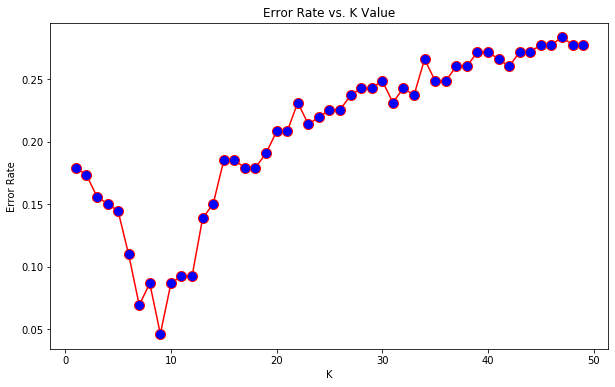

In [111]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 50), error_rate, color='red', linestyle='-', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

We can see that K=9 has the lowest error rate.

In [100]:
model = KNeighborsClassifier(n_neighbors=9)

In [101]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

## Predictions and Evaluations

In [113]:
predictions = model.predict(X_test)

Let's see how perfomed our algorithm for the first 5 cars on the test set.

In [116]:
for i in range(len(predictions[:5])):
    print("Features:", list(X_test.iloc[i, :]))
    print("Label:", y_test.iloc[i])
    print("Prediction:", round(predictions[i], 2))
    print("----------")

Features: [2, 1, 2, 2, 0, 2]
Label: 1
Prediction: 1
----------
Features: [3, 2, 0, 1, 2, 1]
Label: 2
Prediction: 2
----------
Features: [1, 3, 2, 1, 0, 0]
Label: 0
Prediction: 0
----------
Features: [3, 0, 2, 0, 0, 1]
Label: 2
Prediction: 2
----------
Features: [1, 0, 3, 0, 1, 2]
Label: 2
Prediction: 2
----------


Our algorithm made no errors on these 5 cars. But, what about all the test set?

In [120]:
accuracy = model.score(X_test, y_test)
print("Accuracy of our model:", round(accuracy, 2))

Accuracy of our model: 0.95


Around 95% of accuracy! This is a pretty good result.

In [122]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89        41
           1       1.00      0.88      0.93         8
           2       0.95      1.00      0.98       118
           3       0.86      1.00      0.92         6

    accuracy                           0.95       173
   macro avg       0.95      0.93      0.93       173
weighted avg       0.96      0.95      0.95       173



Our F1-score is also around 95% of accuracy. Our algorithm definitely performed well to predict the category of the cars. 

This concludes this second Micro Project.